In [0]:
import os
import numpy as np
import cv2
from tqdm import tqdm
import matplotlib.pyplot as plt
import tensorflow as tf
%matplotlib inline

In [3]:
!nvidia-smi

Thu Mar 19 09:56:10 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 440.59       Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   54C    P8    27W / 149W |      0MiB / 11441MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                       GPU Memory |
|  GPU  

In [0]:
base_dir = '/content/drive/My Drive/DataForModel'

In [0]:
train_dir = os.path.join(base_dir,'train')

In [0]:
val_dir = os.path.join(base_dir,'val')

In [0]:
classes = ['Grade A','Grade B','Grade C','Grade D','Grade E','Grade F']

In [0]:
# Loading data

train_a_dir = os.path.join(train_dir, 'Grade A') # dir with images of A grade
train_b_dir = os.path.join(train_dir, 'Grade B') # dir with images of B grade
train_c_dir = os.path.join(train_dir, 'Grade C') # dir with images of c grade
train_d_dir = os.path.join(train_dir, 'Grade D') # dir with images of D grade
train_e_dir = os.path.join(train_dir, 'Grade E') # dir with images of E grade
train_f_dir = os.path.join(train_dir, 'Grade F') # dir with images of F grade
val_a_dir = os.path.join(val_dir, 'Grade A')
val_b_dir = os.path.join(val_dir, 'Grade B')
val_c_dir = os.path.join(val_dir, 'Grade C')
val_d_dir = os.path.join(val_dir, 'Grade D')
val_e_dir = os.path.join(val_dir, 'Grade E')
val_f_dir = os.path.join(val_dir, 'Grade F') 

In [9]:
num_a_tr = len(os.listdir(train_a_dir))
num_b_tr = len(os.listdir(train_b_dir))
num_c_tr = len(os.listdir(train_c_dir))
num_d_tr = len(os.listdir(train_d_dir))
num_e_tr = len(os.listdir(train_e_dir))
num_f_tr = len(os.listdir(train_f_dir))

num_a_val = len(os.listdir(val_a_dir))
num_b_val = len(os.listdir(val_b_dir))
num_c_val = len(os.listdir(val_c_dir))
num_d_val = len(os.listdir(val_d_dir))
num_e_val = len(os.listdir(val_e_dir))
num_f_val = len(os.listdir(val_f_dir))

total_train = num_a_tr + num_b_tr + num_c_tr + num_d_tr + num_e_tr + num_f_tr
total_val = num_a_val + num_b_val + num_c_val + num_d_val + num_e_val + num_f_val

print('total training Grade A images:', num_a_tr)
print('total training Grade B images:', num_b_tr)
print('total training Grade C images:', num_c_tr)
print('total training Grade D images:', num_d_tr)
print('total training Grade E images:', num_e_tr)
print('total training Grade F images:', num_f_tr)

print('total validation Grade A images:', num_a_val)
print('total validation Grade B images:', num_b_val)
print('total validation Grade C images:', num_c_val)
print('total validation Grade D images:', num_d_val)
print('total validation Grade E images:', num_e_val)
print('total validation Grade F images:', num_f_val)

print("--")
print("Total training images:", total_train)
print("Total validation images:", total_val)

total training Grade A images: 391
total training Grade B images: 429
total training Grade C images: 601
total training Grade D images: 592
total training Grade E images: 333
total training Grade F images: 1369
total validation Grade A images: 301
total validation Grade B images: 311
total validation Grade C images: 401
total validation Grade D images: 441
total validation Grade E images: 331
total validation Grade F images: 661
--
Total training images: 3715
Total validation images: 2446


In [0]:
# Setting model parameters
BATCH_SIZE = 35 # number of training examples to process before updating our model variables.
IMG_SIZE = 150 #To reshape all the images to 224x224.

In [0]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator


# Data Preparation.

train_image_generator = ImageDataGenerator(rescale=1./255) # generator for training
validation_image_generator = ImageDataGenerator(rescale=1./255) # generator for validation

In [12]:

train_data_gen = train_image_generator.flow_from_directory(batch_size=BATCH_SIZE,
                                                           directory=train_dir,
                                                           shuffle=True,
                                                           target_size=(IMG_SIZE,IMG_SIZE),
                                                           class_mode='sparse')

val_data_gen = validation_image_generator.flow_from_directory(batch_size=BATCH_SIZE,
                                                              directory=val_dir,
                                                              shuffle=False,
                                                              target_size=(IMG_SIZE,IMG_SIZE),
                                                              class_mode='sparse')

Found 3715 images belonging to 6 classes.
Found 2446 images belonging to 6 classes.


In [0]:
model = tf.keras.Sequential([
            tf.keras.layers.Conv2D(32,(3,3),activation='relu',input_shape=(150,150,3)),
            tf.keras.layers.MaxPooling2D(2,2),

            tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
            tf.keras.layers.MaxPooling2D(2,2),

            tf.keras.layers.Conv2D(128,(3,3),activation='relu'),
            tf.keras.layers.MaxPooling2D(2,2),

            tf.keras.layers.Conv2D(128,(3,3),activation='relu'),
            tf.keras.layers.MaxPooling2D(2,2),

            tf.keras.layers.Flatten(),
            tf.keras.layers.Dense(256,activation='relu'),
            tf.keras.layers.Dropout(0.2),
            tf.keras.layers.Dense(512,activation='relu'),
            tf.keras.layers.Dense(6,activation='softmax')
])

In [0]:
model.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),metrics=['accuracy'])

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 128)       1

In [16]:
# Fitting the model
tf.keras.backend.clear_session()
EPOCHS = 50
history = model.fit(train_data_gen,steps_per_epoch=72,epochs=EPOCHS,validation_data=val_data_gen,validation_steps=48)

Epoch 1/50
72/72 [==============================] - 31s 435ms/step - loss: 1.1123 - accuracy: 0.5528 - val_loss: 1.5180 - val_accuracy: 0.3554
Epoch 2/50
72/72 [==============================] - 130s 2s/step - loss: 0.3987 - accuracy: 0.8450 - val_loss: 0.2461 - val_accuracy: 0.9230
Epoch 3/50
72/72 [==============================] - 30s 414ms/step - loss: 0.1355 - accuracy: 0.9538 - val_loss: 2.7388 - val_accuracy: 0.6647
Epoch 4/50
72/72 [==============================] - 31s 431ms/step - loss: 0.0707 - accuracy: 0.9754 - val_loss: 4.1800 - val_accuracy: 0.7232
Epoch 5/50
72/72 [==============================] - 31s 431ms/step - loss: 0.0607 - accuracy: 0.9823 - val_loss: 1.3718 - val_accuracy: 0.8932
Epoch 6/50
72/72 [==============================] - 30s 421ms/step - loss: 0.0470 - accuracy: 0.9867 - val_loss: 1.2850 - val_accuracy: 0.8144
Epoch 7/50
72/72 [==============================] - 30s 423ms/step - loss: 0.0352 - accuracy: 0.9897 - val_loss: 3.0915 - val_accuracy: 0.7250
E

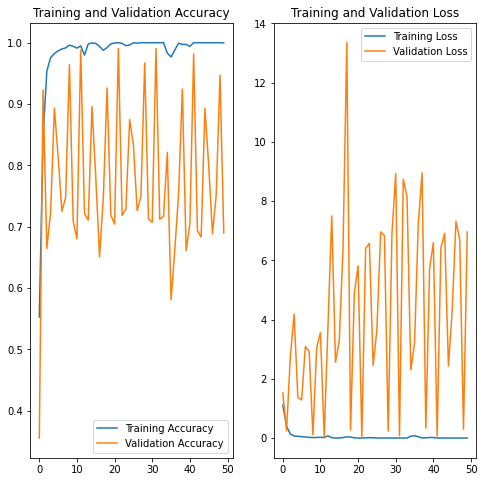

In [18]:
# Visualizing the results


acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(EPOCHS)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.savefig('./foo.png')
plt.show()


In [19]:
# Not the good model. 
# Lets try Transfer Learning

import tensorflow_hub as hub

tf.keras.backend.clear_session()

IMG_SHAPE = 224

train_data_gen_new = train_image_generator.flow_from_directory(batch_size=BATCH_SIZE,
                                                           directory=train_dir,
                                                           shuffle=True,
                                                           target_size=(IMG_SHAPE,IMG_SHAPE),
                                                           class_mode='sparse')

val_data_gen_new = validation_image_generator.flow_from_directory(batch_size=BATCH_SIZE,
                                                              directory=val_dir,
                                                              shuffle=False,
                                                              target_size=(IMG_SHAPE,IMG_SHAPE),
                                                              class_mode='sparse')





Found 3715 images belonging to 6 classes.
Found 2446 images belonging to 6 classes.


In [0]:
# Transfer Learning 1 -  MobileNet
# Building feature extractor 

URL = "https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4"

feature_extractor = hub.KerasLayer(URL,input_shape=(IMG_SHAPE,IMG_SHAPE,3))



In [0]:
feature_extractor.trainable = False # Freezing the model.


In [0]:
# Attaching model with an output layer. 

model = tf.keras.Sequential([
                             feature_extractor,
                             tf.keras.layers.Dense(6)
])

In [24]:
# Trainging the model. 

model.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer (KerasLayer)     (None, 1280)              2257984   
_________________________________________________________________
dense (Dense)                (None, 6)                 7686      
Total params: 2,265,670
Trainable params: 7,686
Non-trainable params: 2,257,984
_________________________________________________________________


In [25]:
EPOCHS1=40

history = model.fit(train_data_gen_new,steps_per_epoch=72,epochs=EPOCHS1,validation_data=val_data_gen_new,validation_steps=48)

Epoch 1/40
72/72 [==============================] - 34s 474ms/step - loss: 0.4587 - accuracy: 0.8746 - val_loss: 0.4133 - val_accuracy: 0.8726
Epoch 2/40
72/72 [==============================] - 34s 477ms/step - loss: 0.0744 - accuracy: 0.9956 - val_loss: 0.0930 - val_accuracy: 0.9946
Epoch 3/40
72/72 [==============================] - 32s 446ms/step - loss: 0.0395 - accuracy: 0.9984 - val_loss: 0.2413 - val_accuracy: 0.9141
Epoch 4/40
72/72 [==============================] - 34s 470ms/step - loss: 0.0261 - accuracy: 0.9996 - val_loss: 0.1892 - val_accuracy: 0.9339
Epoch 5/40
72/72 [==============================] - 34s 471ms/step - loss: 0.0184 - accuracy: 0.9996 - val_loss: 0.1329 - val_accuracy: 0.9553
Epoch 6/40
72/72 [==============================] - 34s 468ms/step - loss: 0.0159 - accuracy: 0.9996 - val_loss: 0.0879 - val_accuracy: 0.9803
Epoch 7/40
72/72 [==============================] - 33s 462ms/step - loss: 0.0117 - accuracy: 1.0000 - val_loss: 0.1779 - val_accuracy: 0.9345

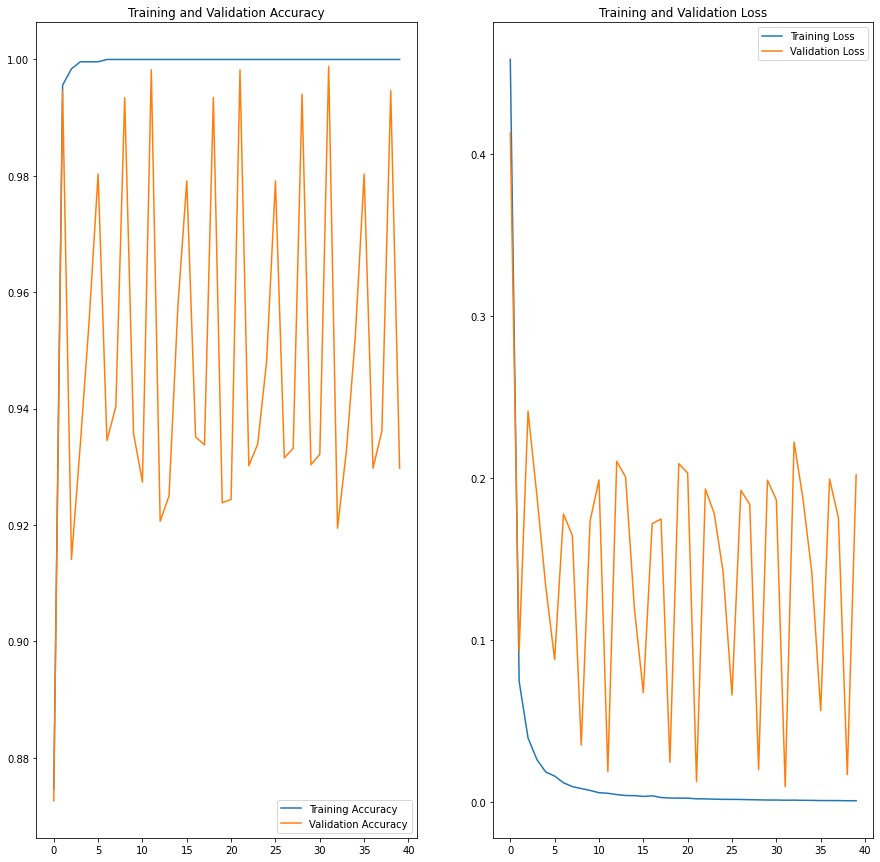

In [29]:
# Visualizing the results


acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(EPOCHS1)

plt.figure(figsize=(15, 15))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.savefig('./foo1.png')
plt.show()


In [28]:
# Saving the model as Keras .h5 model.
import time
t = time.time() # Using time so that the name of the file will be a timestamp.
export_path_keras = './{}.h5'.format(int(t))
print(export_path_keras)

model.save(export_path_keras)

./1584615517.h5
